Componente Principal 1: 0.7296
Componente Principal 2: 0.9581
Componente Principal 3: 0.9948
Componente Principal 4: 1.0000


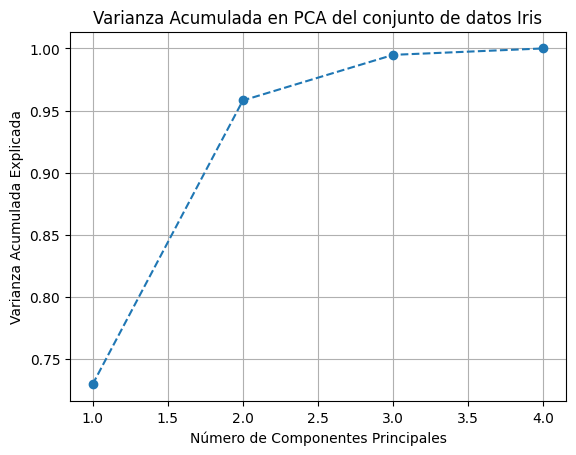

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data

# Estandarizar los datos (recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_scaled, rowvar=False)

# Calcular los valores propios (eigenvalues) y vectores propios (eigenvectors)
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Ordenar los valores propios en orden descendente
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Calcular la varianza acumulada
total_variance = np.sum(eigenvalues_sorted)
variance_explained = np.cumsum(eigenvalues_sorted) / total_variance
for i, explained_variance in enumerate(variance_explained):
    
    print(f"Componente Principal {i+1}: {explained_variance:.4f}")

import matplotlib.pyplot as plt

plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada en PCA del conjunto de datos Iris')
plt.grid(True)
plt.show()

In [86]:

def PCA_PRAC(num_components):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from sklearn.datasets import load_iris
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names

    # Estandarizar los datos (opcional pero recomendado para PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    iris_scaled = pd.DataFrame(data=X_scaled, columns=feature_names)
    print("\n Estandarizados:")
    display(iris_scaled.head())

    # Aplicar PCA
    cov_matrix = np.cov(X_scaled, rowvar=False)
    iris_covmat = pd.DataFrame(data=cov_matrix, columns=iris.feature_names)
    iris_covmat.index = iris.feature_names
    print("\nCalculo de la covarianza:")
    display(iris_covmat)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    print("Valores Propios (Eigenvalues):")
    print(eigenvalues)
    print("\nVectores Propios (Eigenvectors):")
    print(eigenvectors)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    num_components = num_components
    top_eigenvectors = eigenvectors[:, :num_components]
    X_pca = X_scaled.dot(top_eigenvectors)

    # dimensión de X_pca
    num_filas, num_columnas = X_pca.shape
    print("\nDimensiones del resultado de PCA:", num_filas, "x", num_columnas)

    # varianza explicada
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    print("\nVarianza Explicada por cada Componente Principal:")
    print(explained_variance_ratio)

    print("\nResultado de PCA:")
    print(X_pca[:5, :])


    if num_components == 3:
        fig = plt.figure(figsize=(15, 15))
        ax = plt.subplot(1, 2, 1, projection='3d')

        for target, color in zip(np.unique(y), ['r', 'g', 'b']):
            indices_to_keep = y == target
            ax.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1],X[indices_to_keep, 2], c=color, label=target)
            
        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')
        ax.set_zlabel('Característica 3')
        ax.set_title('Conjunto de Datos Iris')
        
        class_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
        ax = plt.subplot(1, 2, 2, projection='3d')
        for target in np.unique(y):
            indices_to_keep = y == target
            ax.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1],X[indices_to_keep, 2], label=class_mapping[target])

        ax.set_xlabel('Componente Principal 1')
        ax.set_ylabel('Componente Principal 2')
        ax.set_zlabel('omponente Principal 3')
        ax.set_title('Datos después de PCA')
        ax.legend()
        plt.tight_layout()
        
        
    elif num_components == 2:
        plt.figure(figsize=(12, 6))
        ax = plt.subplot(1, 2, 1)
        for target, color in zip(np.unique(y), ['r', 'g', 'b']):
            indices_to_keep = y == target
            ax.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], c=color, label=target)
        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')
        ax.set_title('Conjunto de Datos Iris')
        
        class_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
        ax = plt.subplot(1, 2, 2)
        for target in np.unique(y):
            indices_to_keep = y == target
            ax.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1], label=class_mapping[target])

        ax.set_xlabel('Componente Principal 1')
        ax.set_ylabel('Componente Principal 2')
        ax.set_title('Datos después de PCA')
        ax.legend()
        plt.tight_layout()
        
    elif num_components == 1:
        plt.figure(figsize=(12, 6))
        ax = plt.subplot(1, 2, 1)
        for target, color in zip(np.unique(y), ['r', 'g', 'b']):
            indices_to_keep = y == target
            ax.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], c=color, label=target)
        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')
        ax.set_title('Conjunto de Datos Iris')
        
        class_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
        ax = plt.subplot(1, 2, 2)
        for target in np.unique(y):
            indices_to_keep = y == target
            y_constant = np.zeros(X_pca.shape[0]) 
            ax.scatter(X_pca[indices_to_keep, 0], np.zeros(np.sum(indices_to_keep)), label=class_mapping[target])
        ax.set_xlabel('Primer Componente Principal')
        ax.set_title('PCA del Conjunto de Datos Iris')
        ax.legend()
        plt.tight_layout()

    else:
        print("\nNo se puede graficar en más de 3 dimensiones")



 Estandarizados:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444



Calculo de la covarianza:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


Valores Propios (Eigenvalues):
[2.93808505 0.9201649  0.14774182 0.02085386]

Vectores Propios (Eigenvectors):
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Dimensiones del resultado de PCA: 150 x 3

Varianza Explicada por cada Componente Principal:
[0.72962445 0.22850762 0.03668922 0.00517871]

Resultado de PCA:
[[-2.26470281 -0.4800266  -0.12770602]
 [-2.08096115  0.67413356 -0.23460885]
 [-2.36422905  0.34190802  0.04420148]
 [-2.29938422  0.59739451  0.09129011]
 [-2.38984217 -0.64683538  0.0157382 ]]


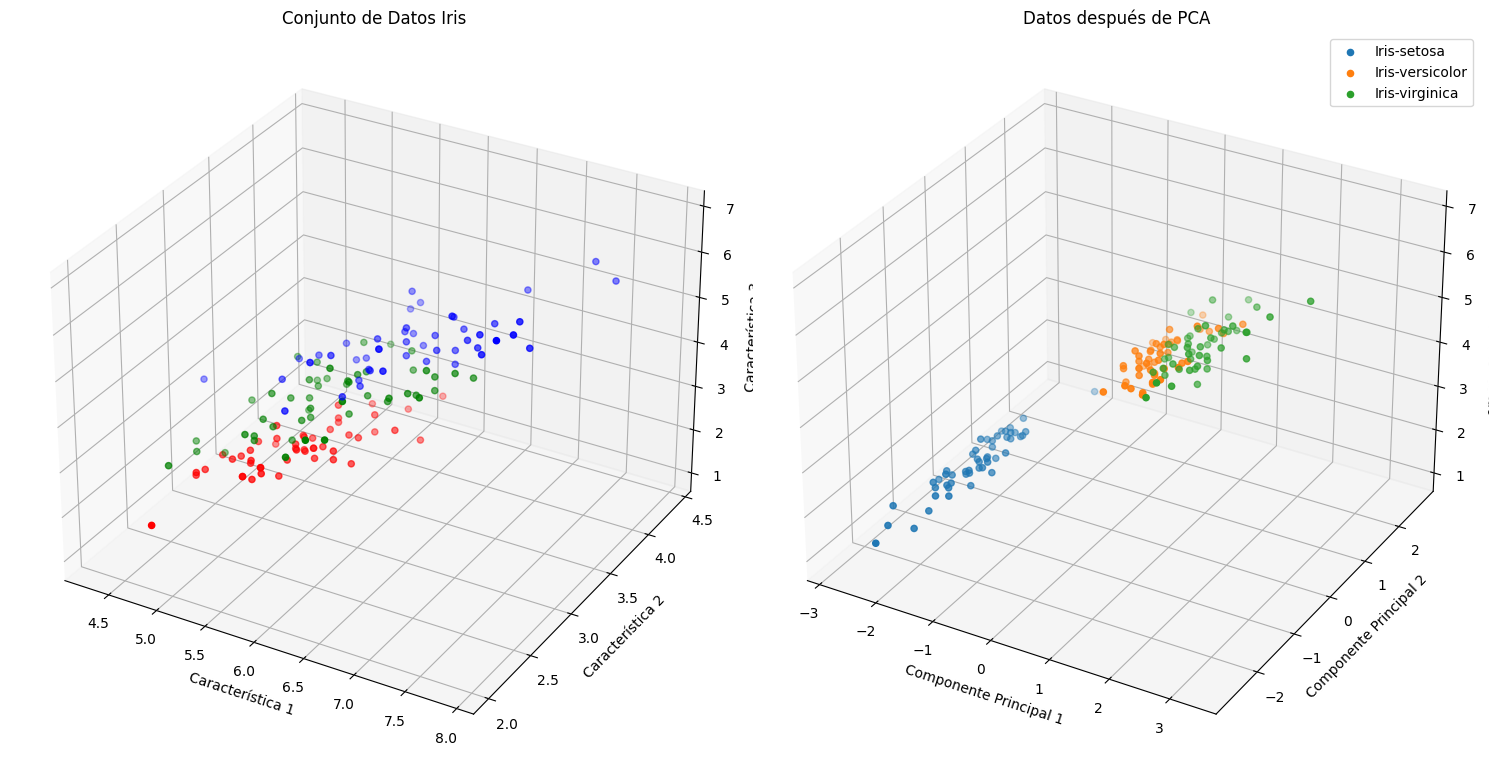

In [98]:
PCA_PRAC(3)

(150, 3)


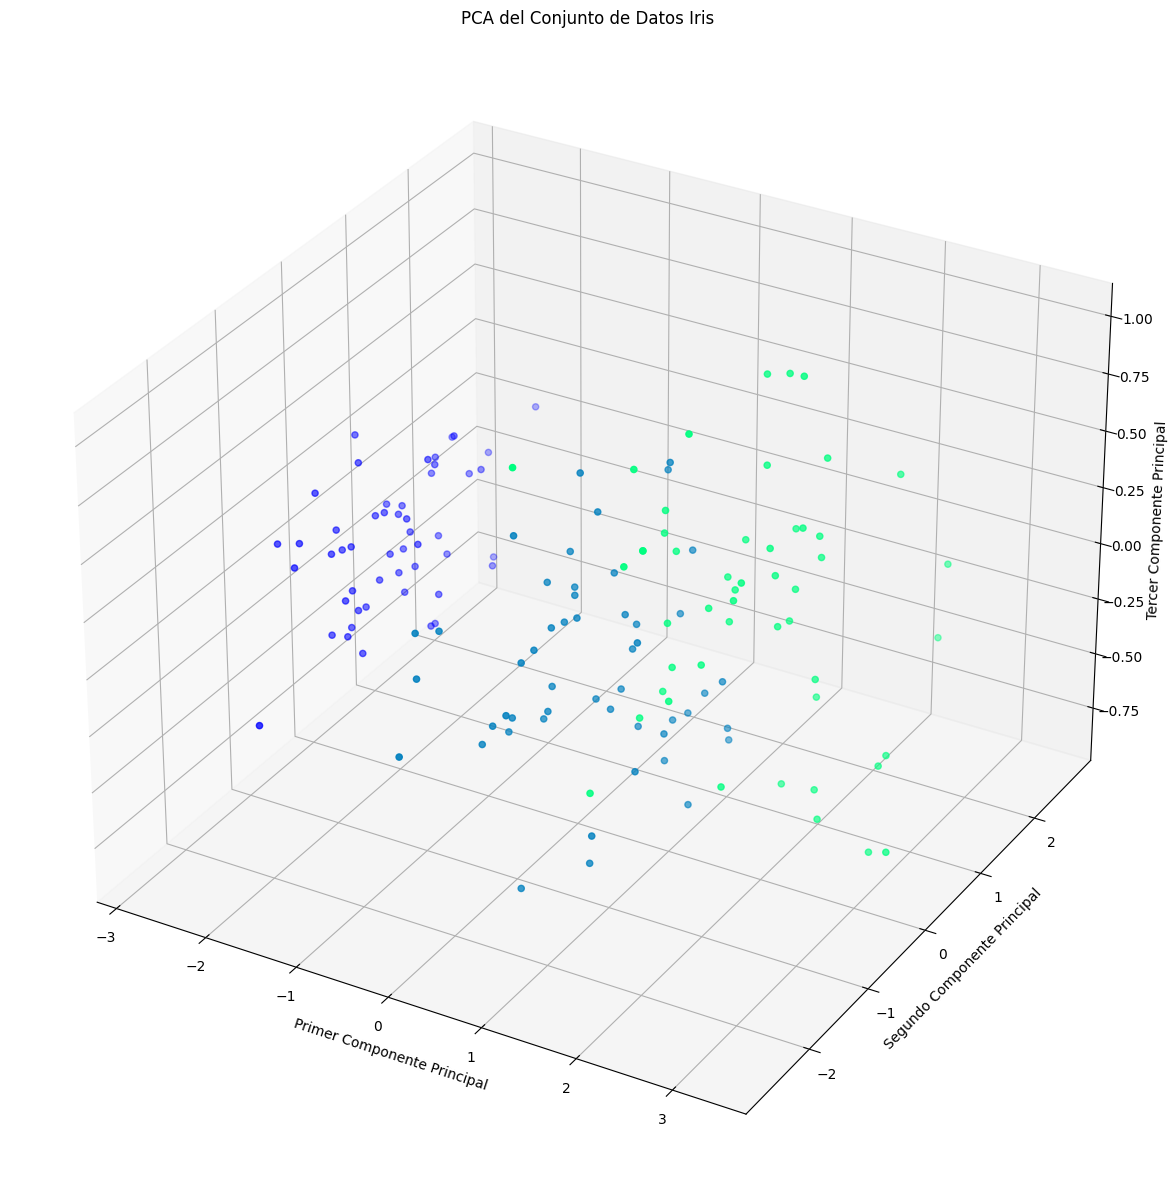

In [99]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)
if n_components == 3:
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=iris.target, cmap='winter')
    ax.set_xlabel('Primer Componente Principal')
    ax.set_ylabel('Segundo Componente Principal')
    ax.set_zlabel('Tercer Componente Principal')
    ax.set_title('PCA del Conjunto de Datos Iris')
elif n_components == 2:
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='winter')
    ax.set_xlabel('Primer Componente Principal')
    ax.set_ylabel('Segundo Componente Principal')
    ax.set_title('PCA del Conjunto de Datos Iris')
elif n_components == 1:
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111)
    y_constant = np.zeros(X_pca.shape[0]) 
    ax.scatter(X_pca[:, 0], y_constant, c=iris.target, cmap='winter')
    ax.set_xlabel('Primer Componente Principal')
    ax.set_title('PCA del Conjunto de Datos Iris')
else:
    print("No se puede graficar en más de 3 dimensiones")
